# Titanic Survival Prediction – EDA

## Table of Contents
1. [Overview](#overview)
2. [Setup](#setup)
3. [Load-Inspect](#load)
4. [EDA](#eda)
5. [Feature-Engineering](#fe)
6. [Data Preprocessing: Imputation, Encoding, Scaling, Outlier Treatment](#impute)


# 2. Setup
<a id="setup"></a>


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import numpy as np

# 3. Load & Inspect
<a id="load"></a>


In [3]:
titanic_data = pd.read_csv("C:\\Users\\HP\\Desktop\\Projects\\EDA\\Data\\titanic.csv") 

In [4]:
titanic_data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
titanic_data.describe()
#? Saw that age had minimum value of 0.17 suggesting either age is in months or there are some anomalies in the data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df = titanic_data
df[df['Age'] < 1]
#! Upon further look at the age column we can see that age below 1 is in months format so 0.17 would mean ~2 months old 
#! Other ages example 35.5 means 35 years old and 6 months

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
201,1093,0,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.400,NaN,S
250,1142,1,2,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.750,NaN,S
281,1173,0,3,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.775,NaN,S
307,1199,0,3,"Aks, Master. Philip Frank",male,0.83,0,1,392091,9.350,NaN,S
354,1246,1,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.575,NaN,S


In [8]:
df.isnull().sum()
#! Age has the most null values which will be need to handled


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
df.duplicated().sum()
# * * There are no duplicate values in the dataset 


np.int64(0)

In [10]:
# Dividing columns in the dataset into numerical cols and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include = ['object']).columns.tolist()

In [11]:
numeric_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [12]:
# Deleting column which have distinct values as they would provide no useful information when plotting
del numeric_cols[0:3]
numeric_cols

['Age', 'SibSp', 'Parch', 'Fare']

# 4. EDA
<a id="eda"></a>


In [13]:
save_path = "C:\\Users\\HP\\Desktop\\Projects\\EDA\\Univariate Charts"

for col in numeric_cols:
    df[col].hist(
        bins=20,
        color="red",
        edgecolor="black"
    )
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)

    # save plot to the given folder
    plt.savefig(f"{save_path}/histogram_{col}.png")

    # clear figure
    plt.clf()


<Figure size 640x480 with 0 Axes>

In [14]:
target = "Survived"

# Keep only relevant features
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Split into numeric vs categorical
num_cols = df[feature_cols].select_dtypes(include=['number']).columns.tolist()
cat_cols = df[feature_cols].select_dtypes(include=['object', 'category']).columns.tolist()


In [15]:
#Function to automate bivariate analysis
def bivariate_plot(df, col1, col2, target=None, save_path="."):
    plt.figure(figsize=(8,6))

    if target is not None:
        if col1 == target and pd.api.types.is_numeric_dtype(df[col2]):
            sns.boxplot(x=col1, y=col2, data=df, palette="Set2")
            plt.title(f"{col2} distribution by {col1}")
        elif col2 == target and pd.api.types.is_numeric_dtype(df[col1]):
            sns.boxplot(x=col2, y=col1, data=df, palette="Set2")
            plt.title(f"{col1} distribution by {col2}")
        elif (col1 == target and df[col2].dtype == "object") or (col2 == target and df[col1].dtype == "object"):
            feature = col2 if col1 == target else col1
            sns.barplot(x=feature, y=target, data=df, palette="Set1")
            plt.title(f"Survival rate by {feature}")
        plt.xticks(rotation=45)
        plt.savefig(f"{save_path}/{col1}_vs_{col2}.png")
        plt.clf()
        return

    if pd.api.types.is_numeric_dtype(df[col1]) and pd.api.types.is_numeric_dtype(df[col2]):
        sns.scatterplot(x=col1, y=col2, data=df, color="teal")
        sns.regplot(x=col1, y=col2, data=df, scatter=False, color="red")
        plt.title(f"Scatterplot: {col1} vs {col2}")
    elif pd.api.types.is_numeric_dtype(df[col1]) and (df[col2].dtype == "object" or pd.api.types.is_categorical_dtype(df[col2])):
        sns.boxplot(x=col2, y=col1, data=df, palette="Set2")
        plt.title(f"Boxplot: {col1} across {col2}")
    elif pd.api.types.is_numeric_dtype(df[col2]) and (df[col1].dtype == "object" or pd.api.types.is_categorical_dtype(df[col1])):
        sns.boxplot(x=col1, y=col2, data=df, palette="Set2")
        plt.title(f"Boxplot: {col2} across {col1}")
    else:
        sns.countplot(x=col1, hue=col2, data=df, palette="Set1")
        plt.title(f"Countplot: {col1} vs {col2}")

    plt.xticks(rotation=45)
    plt.savefig(f"{save_path}/{col1}_vs_{col2}.png")
    plt.clf()


In [16]:
for col in feature_cols:
    bivariate_plot(
        df,
        "Survived",
        col,
        target="Survived",
        save_path="C:\\Users\\HP\\Desktop\\Projects\\EDA\\Bivariate Chart"
    )

C:\Users\HP\AppData\Local\Temp\ipykernel_18436\1107252010.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col1, y=col2, data=df, palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_18436\1107252010.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y=target, data=df, palette="Set1")
C:\Users\HP\AppData\Local\Temp\ipykernel_18436\1107252010.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col1, y=col2, data=df, palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_18436\1107252010.py:7: FutureWarning: 

Passing

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

# 5. Feature Engineering
<a id="fe"></a>


In [18]:
# Extract title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Check unique titles
print(df['Title'].unique())


['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


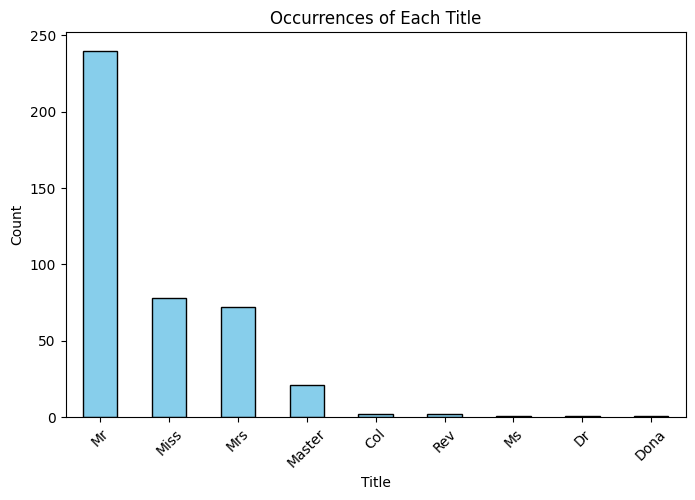

In [19]:
title_counts = df['Title'].value_counts()

# Plot
plt.figure(figsize=(8,5))
title_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Occurrences of Each Title")
plt.xlabel("Title")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [20]:
df["Title"] = df['Title'].replace(['Col','Rev','Dr','Dona'],'Rare')
df['Title'] = df['Title'].replace({'Ms':'Miss'})

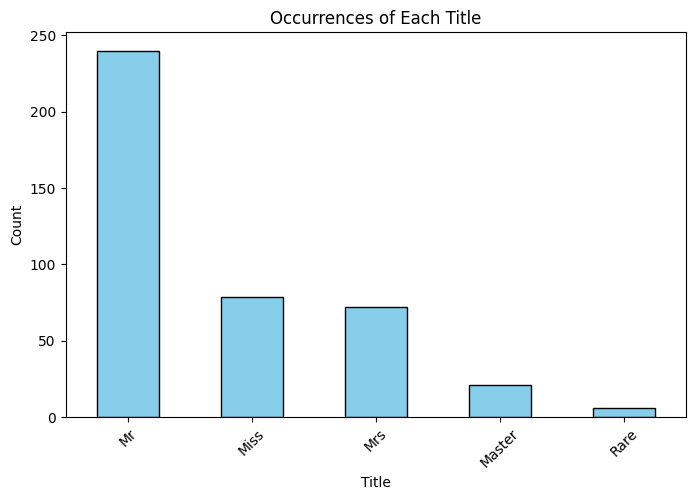

In [21]:
title_counts = df['Title'].value_counts()

# Plot
plt.figure(figsize=(8,5))
title_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Occurrences of Each Title")
plt.xlabel("Title")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 6. Data Preprocessing: Imputation, Encoding, Scaling, Outlier Treatment
<a id="impute"></a>


In [22]:
df['Age'] = df.groupby(['Title', 'Pclass'])['Age']\
              .transform(lambda x: x.fillna(x.median()))


In [23]:
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

df['Fare'].isnull().sum()

np.int64(0)

In [24]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df['Embarked'].isnull().sum()

np.int64(0)

In [25]:
# Log-transform Fare
df['Fare_log'] = np.log1p(df['Fare'])

# Compare distributions
df[['Fare', 'Fare_log']].describe()

,Fare,Fare_log
count,418.000000,418.000000
mean,35.576535,3.015421
std,55.850103,0.966932
min,0.000000,0.000000
25%,7.895800,2.185579
50%,14.454200,2.737881
75%,31.471875,3.480373
max,512.329200,6.240917


In [26]:
# Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create IsAlone flag
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df[['FamilySize','IsAlone']].head()

,FamilySize,IsAlone
0,1,1
1,2,0
2,1,1
3,1,1
4,3,0
